In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
df =pd.read_csv('train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
train_update=pd.read_csv('train_updates_20220929.csv')

In [ ]:
df.head()

In [33]:
test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [6]:
df["protein_sequence"][0]

'AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVGMIKDAGDDPDVTHGAEIQAFVRFASEDRLEGGEGVGVVTKPGLGVPVGEPAINPVPRRMIWEAVREVTERPLAVTIAIPGGEELAKKTLNPRLGILGGLSVLGTTGVVKPYSTSAFRMSVVQAVGVARANGLLEIAATTGGKSERFAQRLLPHLPEMAFIEMGDFVGDVLRAARKVGVEVVRVVGMIGKISKMADGKTMTHAAGGEVNLSLLLSLLKEAGASPKALKEAEGAATARRFLEIALEEGLELFFVNLVRLAQEKLQAYIGERPFVSVALTDFDEGRCLAAWPDREVYR'

In [7]:
df.describe()

,seq_id,pH,tm
count,31390.000000,31104.000000,31390.000000
mean,15694.500000,6.892339,49.147337
std,9061.656811,1.612225,14.010089
min,0.000000,1.990000,-1.000000
25%,7847.250000,7.000000,42.100000
50%,15694.500000,7.000000,48.000000
75%,23541.750000,7.000000,53.800000
max,31389.000000,64.900000,130.000000


In [8]:
df.corr()

,seq_id,pH,tm
seq_id,1.000000,-0.040164,0.008750
pH,-0.040164,1.000000,-0.044544
tm,0.008750,-0.044544,1.000000


In [9]:
df.sort_values('pH',ascending = False, inplace = True)

In [10]:
df.head()

,seq_id,protein_sequence,pH,data_source,tm
13449,13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,NaN,0.1
13447,13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,NaN,0.2
1014,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,NaN,5.5
989,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,55.6,NaN,5.5
1079,1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,NaN,5.5


In [11]:
df.tail()

,seq_id,protein_sequence,pH,data_source,tm
28753,28753,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,10.1128/AEM.02129-17,58.9
28754,28754,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,10.1128/AEM.02129-17,59.4
28755,28755,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,10.1128/AEM.02129-17,57.8
28756,28756,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,10.1128/AEM.02129-17,59.3
29077,29077,MVRPTILLTSLLLAPFAAASPILEERQAAQSVDQLIKARGKVYFGV...,NaN,10.1016/j.ijbiomac.2016.08.056,71.3


In [12]:
df.drop(['data_source'],axis=1,inplace=True)
df

,seq_id,protein_sequence,pH,tm
13449,13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.1
13447,13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.2
1014,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5
989,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,55.6,5.5
1079,1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5
...,...,...,...,...
28753,28753,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,58.9
28754,28754,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,59.4
28755,28755,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,57.8
28756,28756,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,NaN,59.3


In [13]:
df.isnull().sum()

#286 rows with pH=NaN

seq_id                0
protein_sequence      0
pH                  286
tm                    0
dtype: int64

In [14]:
df['pH'] = df['pH'].fillna(df['pH'].median())

In [1]:
sns.catplot(x='pH',y='tm',data=df,height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show

NameError: name 'sns' is not defined

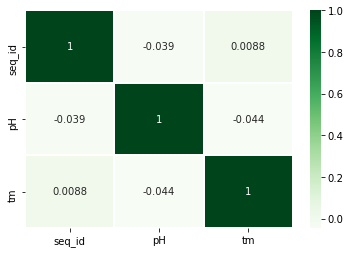

In [15]:
sns.heatmap(df.corr(),linewidths=1,cmap=plt.cm.Greens, annot=True);

In [16]:
list = []
for number in range(len(df)):
    list.append(len(df.protein_sequence[number]))
df['length'] = list

In [17]:
df

,seq_id,protein_sequence,pH,tm,length
13449,13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.1,341
13447,13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.2,286
1014,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5,497
989,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,55.6,5.5,265
1079,1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5,1451
...,...,...,...,...,...
28753,28753,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,58.9,549
28754,28754,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,59.4,469
28755,28755,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,57.8,128
28756,28756,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,59.3,593


In [18]:
df.drop(['seq_id'],axis=1,inplace=True)



In [19]:
#df.reset_index() 

In [20]:
#df.drop(['index'],axis=1,inplace=True)

In [21]:
df

,protein_sequence,pH,tm,length
13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.1,341
13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,64.9,0.2,286
1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5,497
989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,55.6,5.5,265
1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,55.6,5.5,1451
...,...,...,...,...
28753,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,58.9,549
28754,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,59.4,469
28755,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,57.8,128
28756,MVLKQRANYLGFLIVFFTAFLVEAVPIKRQSNSTVDSLPPLIPSRT...,7.0,59.3,593


In [22]:
df['pH'].value_counts()

7.00     26748
7.50       576
8.00       502
3.00       288
2.70       274
         ...  
10.30        1
3.19         1
8.60         1
2.34         1
8.30         1
Name: pH, Length: 115, dtype: int64

In [23]:
df['tm'].value_counts()

25.0    1472
20.0     561
50.0     200
45.0     178
49.7     176
        ... 
98.5       1
16.6       1
92.7       1
21.4       1
23.9       1
Name: tm, Length: 770, dtype: int64

In [24]:
#To make things easier here details of all amino acids are listed in search_amino.
search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for amino_acid in search_amino:
     df[amino_acid]=df['protein_sequence'].str.count(amino_acid,re.I)

In [25]:
df.drop(['protein_sequence'],axis=1,inplace=True)
df

,pH,tm,length,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
13449,64.9,0.1,341,15,8,8,3,2,14,1,...,3,9,2,7,14,7,6,13,5,6
13447,64.9,0.2,286,16,8,8,3,2,13,1,...,3,9,2,7,14,7,6,13,5,6
1014,55.6,5.5,497,7,2,7,5,3,8,2,...,0,2,6,5,4,7,13,6,0,8
989,55.6,5.5,265,7,2,7,5,3,8,2,...,0,2,6,4,5,7,13,6,0,8
1079,55.6,5.5,1451,6,2,7,4,3,8,2,...,0,2,6,5,5,7,13,6,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28753,7.0,58.9,549,27,7,20,16,14,22,6,...,5,15,24,11,14,37,33,29,4,19
28754,7.0,59.4,469,27,7,20,16,14,22,6,...,5,14,24,11,15,38,33,29,4,18
28755,7.0,57.8,128,27,7,20,16,14,22,6,...,5,15,24,11,14,38,32,29,5,18
28756,7.0,59.3,593,26,7,20,16,14,22,6,...,5,15,24,11,14,38,33,29,4,18


In [34]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(df)

test.describe()

,seq_id,pH
count,2413.000000,2413.0
mean,32596.000000,8.0
std,696.717422,0.0
min,31390.000000,8.0
25%,31993.000000,8.0
50%,32596.000000,8.0
75%,33199.000000,8.0
max,33802.000000,8.0


In [35]:
search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for amino in search_amino:
    test[amino]=test['protein_sequence'].str.count(amino,re.I)

In [36]:
test.drop(['data_source','protein_sequence'],axis=1,inplace=True)
test.head()

,seq_id,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,31390,8,22,4,15,8,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
1,31391,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
2,31392,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
3,31393,8,22,5,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
4,31394,8,22,4,15,7,11,19,0,6,...,0,19,17,13,3,18,8,13,6,6


In [ ]:
sns.jointplot(data=df, x="pH", y="tm")
#Data Visualization of training data

## Random Forest Regressor

In [61]:
df.head()

,pH,tm,length,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
13449,64.9,0.1,341,15,8,8,3,2,14,1,...,3,9,2,7,14,7,6,13,5,6
13447,64.9,0.2,286,16,8,8,3,2,13,1,...,3,9,2,7,14,7,6,13,5,6
1014,55.6,5.5,497,7,2,7,5,3,8,2,...,0,2,6,5,4,7,13,6,0,8
989,55.6,5.5,265,7,2,7,5,3,8,2,...,0,2,6,4,5,7,13,6,0,8
1079,55.6,5.5,1451,6,2,7,4,3,8,2,...,0,2,6,5,5,7,13,6,0,8


We can see that different columns have  different distributions of data.
Let's convert all the columns into same distribution using normalization(mean=0,var=1), So that our model can understand the data well which helps in better prediction

In [ ]:
normalized_df=(df-df.mean())/df.std()

In [53]:
x=normalized_df.drop(['tm'],axis=1)
y=normalized_df['tm']

In [62]:
#Here we can see that all the columns are normalized and brought down to same distribution
x.head()

,pH,length,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
13449,36.143584,-0.166481,-0.440846,0.109248,-0.478606,-0.513186,-0.731998,-0.392670,-0.693174,-0.485650,...,-0.653549,-0.391395,-0.456406,-0.432508,-0.293288,-0.49966,-0.413680,-0.306206,-0.002882,-0.391458
13447,36.143584,-0.252321,-0.418001,0.109248,-0.478606,-0.513186,-0.731998,-0.417311,-0.693174,-0.485650,...,-0.653549,-0.391395,-0.456406,-0.432508,-0.293288,-0.49966,-0.413680,-0.306206,-0.002882,-0.391458
1014,30.348815,0.076991,-0.623602,-0.360839,-0.506959,-0.478512,-0.681799,-0.540516,-0.616668,-0.512983,...,-0.921909,-0.669628,-0.367492,-0.502057,-0.593861,-0.49966,-0.254368,-0.438132,-0.565390,-0.283715
989,30.348815,-0.285096,-0.623602,-0.360839,-0.506959,-0.478512,-0.681799,-0.540516,-0.616668,-0.512983,...,-0.921909,-0.669628,-0.367492,-0.536831,-0.563804,-0.49966,-0.254368,-0.438132,-0.565390,-0.283715
1079,30.348815,1.565920,-0.646447,-0.360839,-0.506959,-0.495849,-0.681799,-0.540516,-0.616668,-0.512983,...,-0.921909,-0.669628,-0.367492,-0.502057,-0.563804,-0.49966,-0.254368,-0.438132,-0.565390,-0.283715


In [63]:
# Time to prepare the weapons for our model!
# Firstly we should divide the dataset into tran and test. And 80:20 split is the standard ratio used for this split. 


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,y_train.shape

((25112, 22), (25112,))

In [58]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
rf.fit(x_train, y_train);

In [59]:
# predicting the y values for x_test
y_pred = rf.predict(x_test)

In [60]:
def evaluvation_metrics(y_test,y_pred):
  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  import numpy as np 
    
  print("*"*20)

  print("*"*8," Evaluvation Scores ","*"*8)
  print("\nMean Absolute Error : ",mean_absolute_error(y_test,y_pred))
  print("\nMean Squared Error : ",mean_squared_error(y_test,y_pred))
  print("\nRoot Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
  print("\nR Squared Score : ",r2_score(y_test,y_pred))
evaluvation_metrics(y_test,y_pred)

********************
********  Evaluvation Scores  ********

Mean Absolute Error :  0.4374642764908749

Mean Squared Error :  0.3906743796912153

Root Mean Squared Error :  0.6250395025046139

R Squared Score :  0.5923059326140803


Here we can see that MAE,MSE and RMSE are close to 0, which means that our model was able to predict very well with close to 0 error.
R Squared Score describes the percentage of variance between predicted vs actual data. If R Squared is close to 1, then the model prediction is good.

# Thank you


In [78]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV
#from pprint import pprint
#rf = RandomForestRegressor()
#from pprint import pprint
#lets find the parameters used by Randomforest models
#pprint(rf.get_params())


In [79]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [80]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [81]:
#from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)


In [82]:
#rfc.fit(X_train, y_train)

In [92]:
#y_pred_test = rfc.predict(X_test)
#y_pred_train = rfc.predict(X_train)

In [93]:
#x=df.drop(['tm'],axis=1)
#y=df['tm']

In [94]:
#from sklearn.model_selection import train_test_split
#x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.20,random_state=42)
#x_train.shape,y_train.shape

In [95]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV
#from pprint import pprint
#rf = RandomForestRegressor()

In [96]:
#from pprint import pprint
#lets find the parameters used by Randomforest models
#pprint(rf.get_params())


In [97]:
#RF = RandomForestRegressor(n_estimators = 200,
 #                          max_depth = 29,
  #                         min_samples_split = 17,
   #                        min_samples_leaf = 2,
    #                       max_features = 3,
     #                      random_state = 0)
#score = cv_score(RF)
#print("Random Forest score: {:.4f} ({:.4f})".format(score.mean(), score.std()))